<a href="https://colab.research.google.com/github/berkearda/AlphaPoseTrain/blob/main/AlphaPose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Install PyTorch
!pip3 install torch torchvision --extra-index-url https://download.pytorch.org/whl/cu113

# Check torch environment by:  python3 -m torch.utils.collect_env

# 2. Get AlphaPose
!git clone https://github.com/MVIG-SJTU/AlphaPose.git
!cd AlphaPose

# 3. install
!export PATH=/usr/local/cuda/bin/:$PATH
!export LD_LIBRARY_PATH=/usr/local/cuda/lib64/:$LD_LIBRARY_PATH
!pip install cython
!sudo apt-get install libyaml-dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
Cloning into 'AlphaPose'...
remote: Enumerating objects: 2744, done.
remote: Total 2744 (delta 0), reused 0 (delta 0), pack-reused 2744
Receiving objects: 100% (2744/2744), 118.82 MiB | 24.59 MiB/s, done.
Resolving deltas: 100% (1378/1378), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libyaml-doc
The following NEW packages will be installed:
  libyaml-dev
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 58.2 kB of archives.
After this operation, 257 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libyaml-dev amd64 0.2.2-1 [58.2 kB]
Fetched 58.2 kB in 1s (96.9 kB/s)
debconf: unable to initialize fron

In [ ]:
cd AlphaPose

/content/AlphaPose


In [ ]:
!python3 setup.py build develop --user

/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.10
creating build/lib.linux-x86_64-3.10/alphapose
copying alphapose/__init__.py -> build/lib.linux-x86_64-3.10/alphapose
copying alphapose/version.py -> build/lib.linux-x86_64-3.10/alphapose
copying alphapose/opt.py -> build/lib.linux-x86_64-3.10/alphapose
creating build/lib.linux-x86_64-3.10/trackers
copying trackers/__init__.py -> build/lib.linux-x86_64-3.10/trackers
copying trackers/tracker_cfg.py -> 

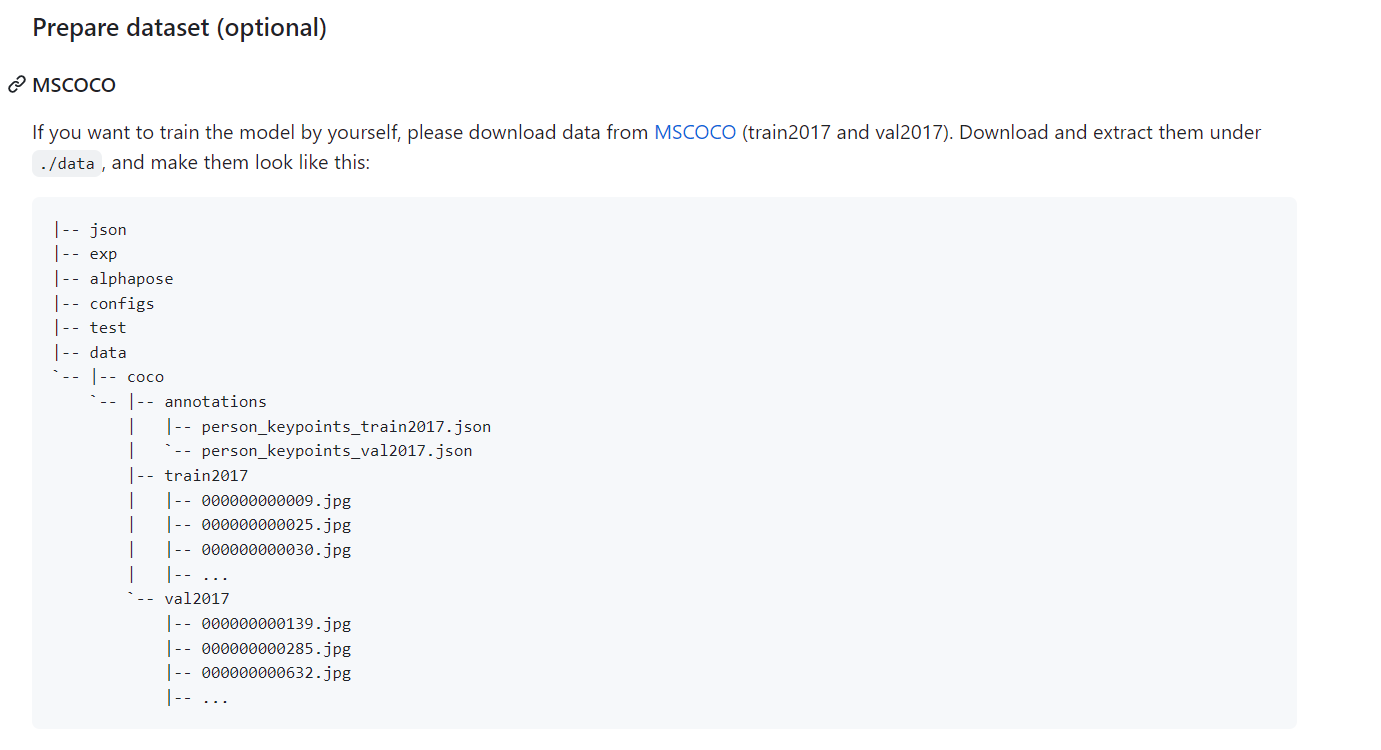

In [ ]:
!curl -LO http://images.cocodataset.org/zips/train2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.0G  100 18.0G    0     0  47.0M      0  0:06:32  0:06:32 --:--:-- 41.9M


In [ ]:
!curl -LO http://images.cocodataset.org/zips/val2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777M  100  777M    0     0  45.6M      0  0:00:17  0:00:17 --:--:-- 47.6M


In [ ]:
!curl -LO http://images.cocodataset.org/annotations/annotations_trainval2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  42.0M      0  0:00:05  0:00:05 --:--:-- 47.8M


In [ ]:
!ls

alphapose		      detector	model_files	   setup.py
alphapose.egg-info	      docs	pretrained_models  trackers
annotations_trainval2017.zip  examples	README.md	   train2017.zip
build			      exp	scripts		   val2017.zip
configs			      LICENSE	setup.cfg


In [ ]:
!unzip -q /content/AlphaPose/train2017.zip -d /content/AlphaPose/train2017

In [ ]:
!unzip -q /content/AlphaPose/val2017.zip -d /content/AlphaPose/val2017

In [ ]:
!unzip -q /content/AlphaPose/annotations_trainval2017.zip -d /content/AlphaPose/annotations

In [ ]:
!mkdir "/content/AlphaPose/data/"

In [ ]:
!mkdir "/content/AlphaPose/data/coco/"

In [ ]:
!mv "/content/AlphaPose/train2017/train2017" "/content/AlphaPose/data/coco"

In [ ]:
!mv "/content/AlphaPose/val2017/val2017" "/content/AlphaPose/data/coco"

In [ ]:
!mkdir "/content/AlphaPose/data/coco/annotations"

In [ ]:
!mv "/content/AlphaPose/annotations/annotations/person_keypoints_train2017.json" "/content/AlphaPose/data/coco/annotations"

In [ ]:
!mv "/content/AlphaPose/annotations/annotations/person_keypoints_val2017.json" "/content/AlphaPose/data/coco/annotations"

In [ ]:
!python scripts/train.py --cfg ./configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml 

******************************
Namespace(cfg='./configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml', exp_id='default', nThreads=60, snapshot=2, rank=-1, dist_url='tcp://192.168.1.214:23345', dist_backend='nccl', launcher='none', sync=False, detector='yolo', board=True, debug=False, map=True, world_size=4, work_dir='./exp/default-256x192_res50_lr1e-3_1x.yaml/', gpus=[0], device=device(type='cuda', index=0))
******************************
{'DATASET': {'TRAIN': {'TYPE': 'Mscoco', 'ROOT': './data/coco/', 'IMG_PREFIX': 'train2017', 'ANN': 'annotations/person_keypoints_train2017.json', 'AUG': {'FLIP': True, 'ROT_FACTOR': 40, 'SCALE_FACTOR': 0.3, 'NUM_JOINTS_HALF_BODY': 8, 'PROB_HALF_BODY': -1}}, 'VAL': {'TYPE': 'Mscoco', 'ROOT': './data/coco/', 'IMG_PREFIX': 'val2017', 'ANN': 'annotations/person_keypoints_val2017.json'}, 'TEST': {'TYPE': 'Mscoco_det', 'ROOT': './data/coco/', 'IMG_PREFIX': 'val2017', 'DET_FILE': './exp/json/test_det_yolo.json', 'ANN': 'annotations/person_keypoints_val2017.json'